In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn import metrics

In [4]:
import seaborn as sns
iris=sns.load_dataset("iris")

In [5]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
#Complete Iris dataset
label_encoder = preprocessing.LabelEncoder()
iris['species']= label_encoder.fit_transform(iris['species']) 

In [7]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
x=iris.iloc[:,0:4]
y=iris['species']

In [9]:
x

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int64

In [11]:
iris['species'].unique()

array([0, 1, 2])

In [12]:
iris.species.value_counts()

0    50
1    50
2    50
Name: species, dtype: int64

In [13]:
colnames = list(iris.columns)
colnames

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [20]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

In [21]:
y_train

58     1
113    2
130    2
137    2
112    2
      ..
25     0
107    2
60     1
121    2
147    2
Name: species, Length: 120, dtype: int64

### Building Decision Tree Classifier using Entropy Criteria

In [22]:
model = DecisionTreeClassifier(criterion = 'gini',max_depth=4,min_samples_split=5)
model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4, min_samples_split=5)

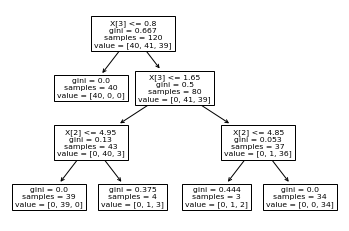

In [23]:
#PLot the decision tree
tree.plot_tree(model);


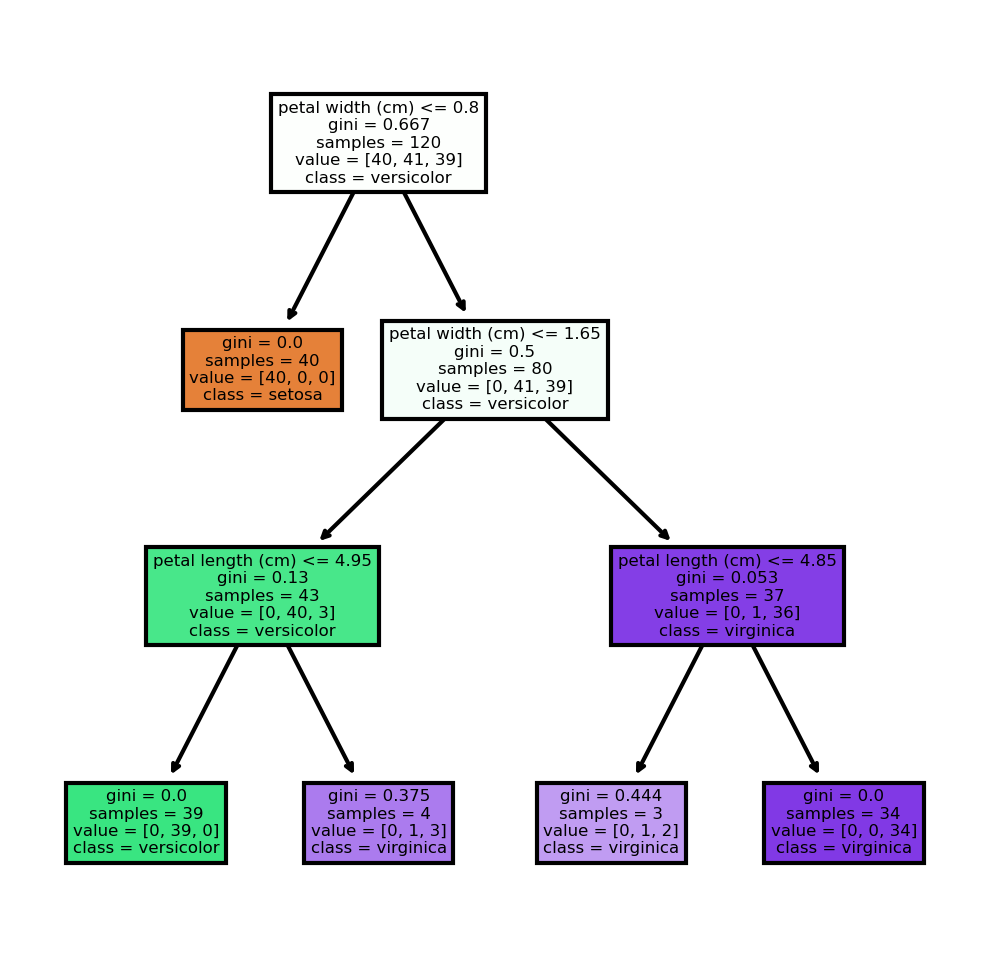

In [24]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [27]:
#Predicting on test data
preds = model.predict(x_test) # predicting on test data set 
pd.Series(preds).value_counts() # getting the count of each category 

2    12
0    10
1     8
dtype: int64

In [28]:
from sklearn import metrics
metrics.accuracy_score(preds,y_test)

0.9666666666666667

### Building Decision Tree Classifier (CART) using Gini Criteria

In [24]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='entropy', max_depth=3,)

In [25]:
y_train

62    1
23    0
26    0
48    0
2     0
     ..
71    1
12    0
50    1
7     0
70    1
Name: species, Length: 120, dtype: int64

In [26]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [27]:
#Prediction and computing the accuracy
preds=model.predict(x_test)
metrics.accuracy_score(preds,y_test)

0.9666666666666667

# Decision Tree Regression Example

In [26]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [50]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
array = iris.values
X = array[:,0:3]
y = array[:,3]

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33,shuffle=True, random_state=1)

In [40]:
model = DecisionTreeRegressor(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [41]:
#Find the mse
from sklearn import metrics
pred=model.predict(X_test)
metrics.mean_squared_error(y_test,pred)

0.03921150254212942

In [42]:
metrics.mean_absolute_percentage_error(y_test,pred)

0.1392255406795081

In [43]:
np.mean(np.abs(y_test-pred)/np.array(y_test))

0.13922554067950807

[Text(167.4, 190.26, 'X[2] <= 2.6\nmse = 0.599\nsamples = 100\nvalue = 1.205'),
 Text(83.7, 135.9, 'X[0] <= 4.95\nmse = 0.012\nsamples = 33\nvalue = 0.23'),
 Text(41.85, 81.53999999999999, 'X[1] <= 2.6\nmse = 0.003\nsamples = 17\nvalue = 0.188'),
 Text(20.925, 27.180000000000007, 'mse = 0.0\nsamples = 1\nvalue = 0.3'),
 Text(62.775000000000006, 27.180000000000007, 'mse = 0.003\nsamples = 16\nvalue = 0.181'),
 Text(125.55000000000001, 81.53999999999999, 'X[2] <= 1.55\nmse = 0.018\nsamples = 16\nvalue = 0.275'),
 Text(104.625, 27.180000000000007, 'mse = 0.008\nsamples = 10\nvalue = 0.23'),
 Text(146.475, 27.180000000000007, 'mse = 0.026\nsamples = 6\nvalue = 0.35'),
 Text(251.10000000000002, 135.9, 'X[2] <= 4.75\nmse = 0.19\nsamples = 67\nvalue = 1.685'),
 Text(209.25, 81.53999999999999, 'X[2] <= 4.15\nmse = 0.039\nsamples = 27\nvalue = 1.267'),
 Text(188.32500000000002, 27.180000000000007, 'mse = 0.018\nsamples = 13\nvalue = 1.115'),
 Text(230.175, 27.180000000000007, 'mse = 0.018\nsamp

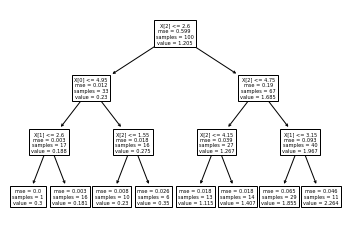

In [44]:
tree.plot_tree(model)

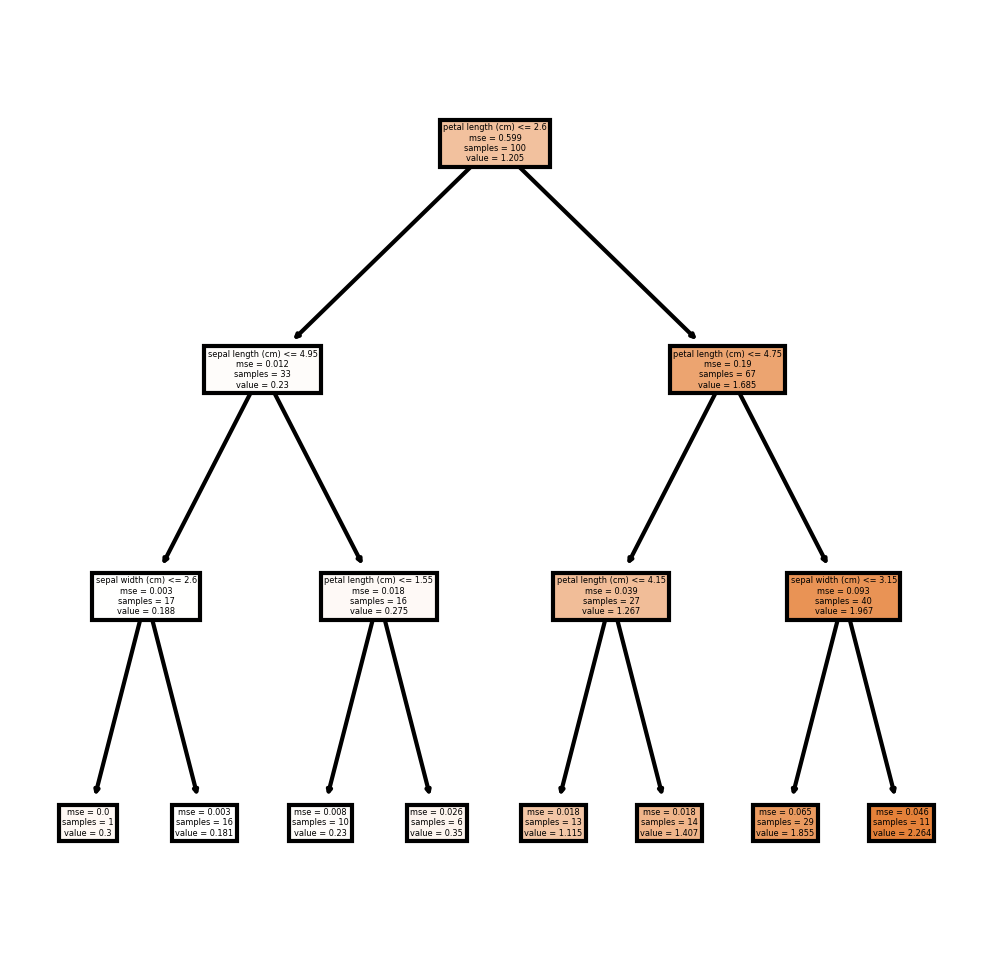

In [56]:
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)']
cn=['petal width (cm)']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);